# Figures

In [4]:
import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib as mpl
import matplotlib.pyplot as plt
from anndata import AnnData
from collections import Counter
from matplotlib_venn import venn2
from matplotlib_venn import venn3
from venn import venn

### Loading datasets

In [6]:
#adata_10x_pp = sc.read_h5ad(r".\outputs\adata_10x_pp.pkl")
#adata_all_pp = sc.read_h5ad(r".\outputs\adata_all_pp.pkl")
#adata_met_pp = sc.read_h5ad(r".\outputs\adata_met_pp.pkl")
#adata_mouse_1_pp = sc.read_h5ad(r".\outputs\adata_mouse_1_pp.pkl")
#adata_mouse_2_pp = sc.read_h5ad(r".\outputs\adata_mouse_2_pp.pkl")
adata_mouse_3_pp = sc.read_h5ad(r"./outputs/adata_mouse_3_pp.pkl")

In [7]:
adata_mouse_3_pp

AnnData object with n_obs × n_vars = 863 × 17043
    obs: 'labels', 'Extra', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'total_counts_apex_only', 'pct_counts_apex_only', 'total_counts_frac_seq_only', 'pct_counts_frac_seq_only', 'total_counts_lncrna', 'pct_counts_lncrna', 'total_counts_in_common_apex_frac_seq', 'pct_counts_in_common_apex_frac_seq', 'total_counts_control_agg', 'pct_counts_control_agg'
    var: 'original_gene_symbol', 'n_cells', 'mt', 'ribo', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'pct_cells_by_count', 'apex_only', 'frac_seq_only', 'lncrna', 'in_common_apex_frac_seq', 'control_0', 'control_1', 'control_2', 'control_3', 'control_4', 'control_5', 'control_6', 'control_7', 'control_8', 'control_9', 'control_10', 'control_11', 'control_12', 'control_13', 'control_14', 'control_15', 'control_16', 'control_17', 'control_18', 'control_19', 'control_20', 'control

### Venn plots

The function cells_criterion takes the dataset and a maximum of 4 criteria and their respective conditions.
* adata: adata object containing the dataset
* criterion: name of the column containing the binary labels which cells are to be plotted on the venn plot
* conditions: threshold values for each of the criteria
* signs: signs composing the conditional predicate for the selection of the criteria based on their threshold conditions
* random: if true, this parameter allows for the selection of random cells as the third criterion
* unite: if true, unites the third and fourth criteria into a single group
* labels: labels to be plotted

In [8]:
def cells_criterio(adata, criterio1, conditions1, 
                   criterio2, conditions2, 
                   criterio3=None, conditions3=None,
                   criterio4=None, conditions4=None,
                   sign1='=', sign2='>', sign3='<', sign4='>',
                   random=False, 
                   labels=['% apex genes', '% frac-seq genes', '% mitochondrial genes', 'random'], 
                   unite=False, fig_name='random', ax=None):
    
    tmp = adata.obs.dropna(axis=0) #drop rows containing nas
    #checking signs for the first criterion and separating dead cells based on its condition
    if sign1 == '>':
        dead_criterio1 = tmp[tmp[criterio1]>conditions1].index.values
    elif sign1 == '<':
        dead_criterio1 = tmp[tmp[criterio1]<conditions1].index.values
    elif sign1 == '=':
        dead_criterio1 = tmp[tmp[criterio1]==conditions1].index.values
    else:
        return None

    #doing the same thing for the second
    if sign2 == '>':
        dead_criterio2 = tmp[tmp[criterio2]>conditions2].index.values
    elif sign2 == '<':
        dead_criterio2 = tmp[tmp[criterio2]<conditions2].index.values
    elif sign2 == '=':
        dead_criterio2 = tmp[tmp[criterio2]==conditions2].index.values
    else:
        return None

    #if the third criterion doesn't exist
    if criterio3 is None:
        #and the random parameter is true, plot the third criterion as a random set of cells with the same dimention as the previous criterion
        if random is True:
            dead_criterio_random = np.random.choice(tmp.index.values, len(dead_criterio2))
            return venn3([set(dead_criterio1), set(dead_criterio2), set(dead_criterio_random)], 
                         set_labels = ('{x}'.format(x=labels[0]), '{y}'.format(y=labels[1]), 'random'), ax=ax)
        else:
            return venn2([set(dead_criterio1), set(dead_criterio2)], 
                         set_labels = ('{x}'.format(x=labels[0]), '{y}'.format(y=labels[1])), ax=ax)
    else:
        if sign3 == '>':
            dead_criterio3 = tmp[tmp[criterio3]>conditions3].index.values
        elif sign3 == '<':
            dead_criterio3 = tmp[tmp[criterio3]<conditions3].index.values
        elif sign3 == '=':
            dead_criterio3 = tmp[tmp[criterio3]==conditions3].index.values
        else:
            return None
            
        if criterio4 is None:
            return venn3([set(dead_criterio1), set(dead_criterio2), set(dead_criterio3)], 
                  set_labels = ('{x}'.format(x=labels[0]), '{y}'.format(y=labels[1]), '{z}'.format(z=labels[2])), ax=ax)
        else:
            if sign4 == '>':
                dead_criterio4 = tmp[tmp[criterio4]>conditions4].index.values
            elif sign4 == '<':
                dead_criterio4 = tmp[tmp[criterio4]<conditions4].index.values
            elif sign4 == '=':
                dead_criterio4 = tmp[tmp[criterio4]==conditions4].index.values
            else:
                return None
            #if unite is True concatenate the criteria 3 and 4 toghether
            if unite is True:
                dead_criterio_u = np.concatenate((dead_criterio3, dead_criterio4), axis=None)
                return venn3([set(dead_criterio1), set(dead_criterio2), set(dead_criterio_u)], 
                      set_labels = ('{x}'.format(x=labels[0]), '{y}'.format(y=labels[1]), ' + '.join([labels[2], labels[3]])), ax=ax)

In [9]:
#preparing the parameters that will be used to produce the venn plots
criteria = [('Extra', 'pct_counts_mt', 'total_counts', 'n_genes'), 
            ('Extra', 'pct_counts_mt', 'pct_counts_frac_seq_only'), 
            ('Extra', 'pct_counts_mt', 'pct_counts_apex_only'), 
            ('Extra', 'pct_counts_mt', 'pct_counts_in_common_apex_frac_seq')]
thresholds = [('D', 20.0, 800000, 6000), ('D', 20.0, 0.100), ('D', 20.0, 0.075), ('D', 20.0, 0.0075)]
signs = [('=', '>', '<', '<'), ('=', '>', '>'), ('=', '>', '>'), ('=', '>', '>')]
labels = [['damaged', '% MT', 'total counts', 'n genes'], 
          ['damaged', '% MT', '% frac-seq'], 
          ['damaged', '% MT', '% apex'],
          ['damaged', '% MT', '% apex frac-seq']]
unites = [True, False, False, False]
letters = ['g)', 'h)', 'i)', 'j)']
titles = ['standard cut-off', 'cut-off % frac-seq', 'cut-off % APEX', 'cut-off % APEX/frac-seq']
numbers = list(range(0, 4))
#list(zip(criteria, thresholds, signs, labels, unites, letters, titles, numbers))

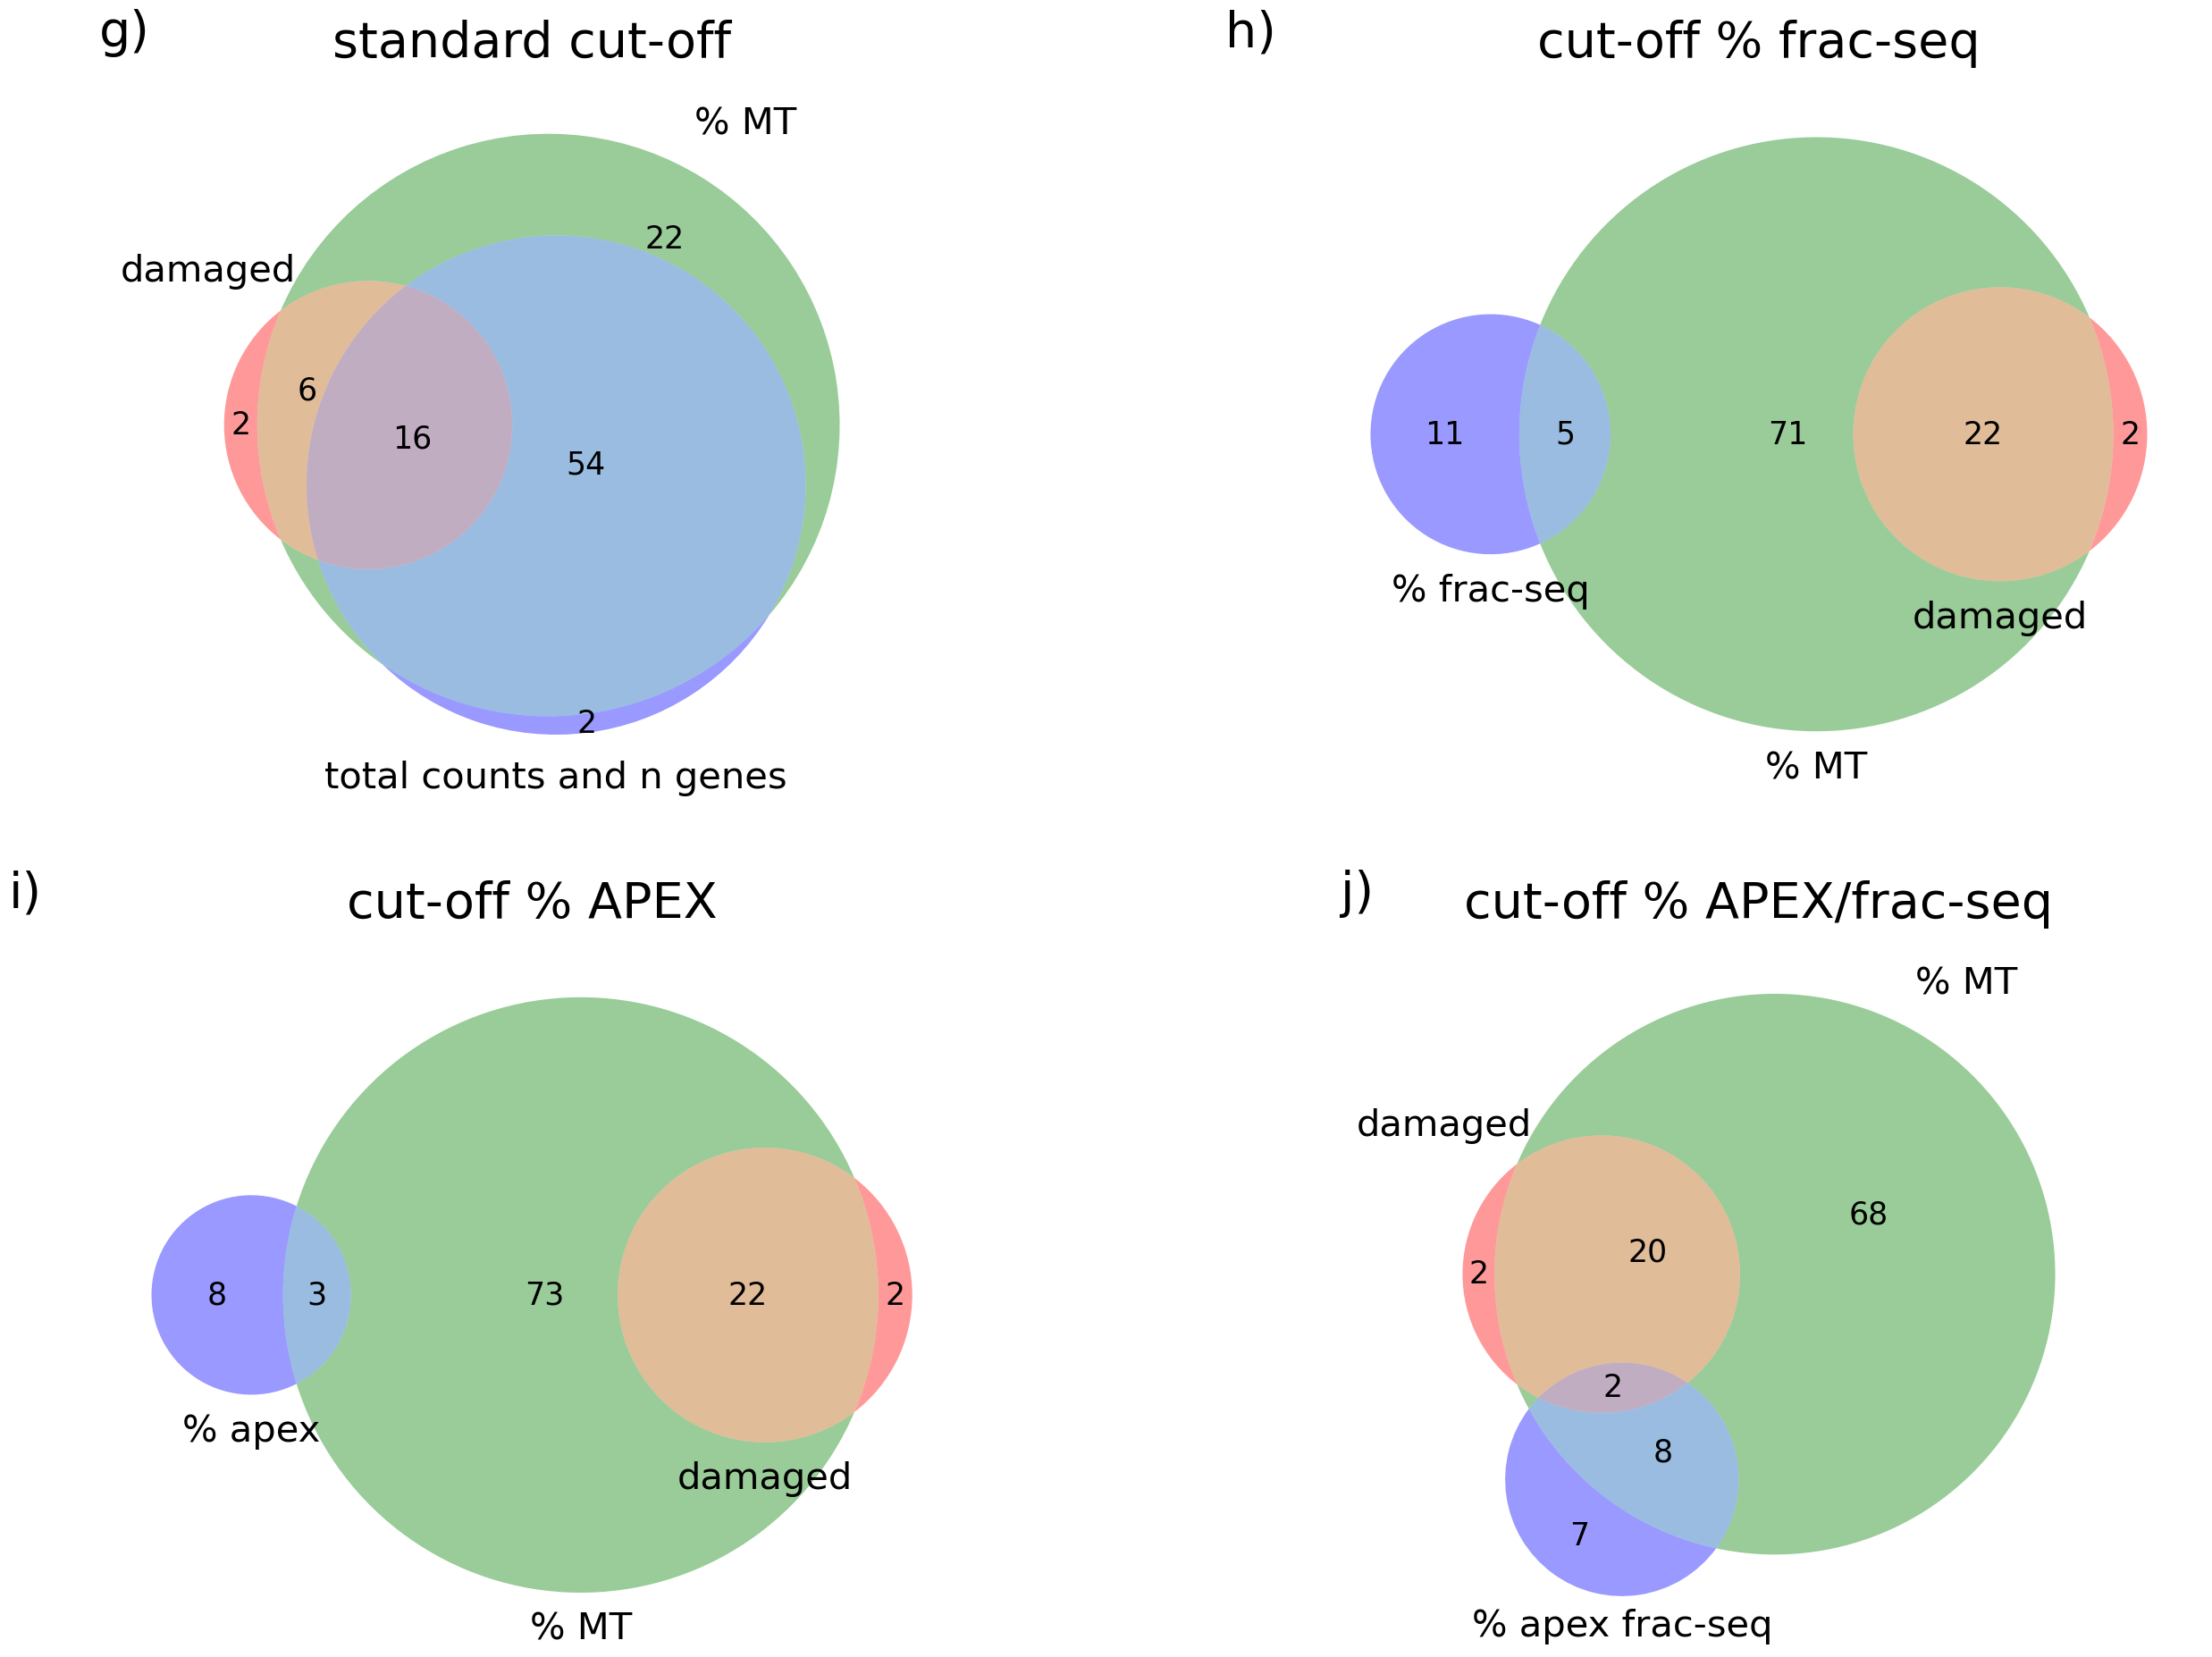

In [10]:
fig_prior,axes_prior=plt.subplots(2,2, figsize= (30,20))
axes_prior=axes_prior.ravel()
for c, t, s, l, u, le, ti, n in list(zip(criteria, thresholds, signs, labels, unites, letters, titles, numbers)):
    if len(c)==4:
        v=cells_criterio(adata_mouse_3_pp, 
                       criterio1=c[0], conditions1=t[0], 
                       criterio2=c[1], conditions2=t[1], 
                       criterio3=c[2], conditions3=t[2], 
                       criterio4=c[3], conditions4=t[3],
                       sign1=s[0], sign2=s[1], sign3=s[2], sign4=s[3], 
                       labels=l, unite=u, ax=axes_prior[n])
        v.get_label_by_id('A').set_text(l[0])
        v.get_label_by_id('A').set_fontsize(30)
        v.get_label_by_id('A').set_fontsize(30)
        v.get_label_by_id('B').set_text(l[1])
        v.get_label_by_id('B').set_fontsize(30)
        v.get_label_by_id('C').set_text(l[2] + ' and ' + l[3])
        v.get_label_by_id('C').set_fontsize(30)
        for x in range(len(v.subset_labels)):
            if v.subset_labels[x] is not None:
                v.subset_labels[x].set_fontsize(25)
    else:
        v=cells_criterio(adata_mouse_3_pp, 
                       criterio1=c[0], conditions1=t[0], 
                       criterio2=c[1], conditions2=t[1], 
                       criterio3=c[2], conditions3=t[2], 
                       sign1=s[0], sign2=s[1], sign3=s[2], 
                       labels=l, unite=u, ax=axes_prior[n])
        v.get_label_by_id('A').set_text(l[0])
        v.get_label_by_id('A').set_fontsize(30)
        v.get_label_by_id('A').set_fontsize(30)
        v.get_label_by_id('B').set_text(l[1])
        v.get_label_by_id('B').set_fontsize(30)
        v.get_label_by_id('C').set_text(l[2])
        v.get_label_by_id('C').set_fontsize(30)
        for x in range(len(v.subset_labels)):
            if v.subset_labels[x] is not None:
                v.subset_labels[x].set_fontsize(25)
                
    axes_prior[n].annotate(le, xy=(-0.1, 1.05), xycoords="axes fraction", fontsize=40)
    axes_prior[n].set_title(ti, fontsize=40, pad=20)
fig_prior.tight_layout(pad=6.0)
plt.savefig(r".\figures\venn.png", dpi=600)
plt.show()

### violin plots

In [11]:
#preparing the parameters for the violin plots
plots = ['n_genes', 'total_counts', 'pct_counts_mt', 'pct_counts_frac_seq_only', 'pct_counts_apex_only', 'pct_counts_in_common_apex_frac_seq']
threshold = [6000, 800000, 20.0, 0.100, 0.075, 0.0075]
title = ['n genes', 'total counts', '% MT', '% frac-seq', '% APEX', '% APEX/frac-seq']
letters = ['a)', 'b)', 'c)', 'd)', 'e)', 'f)']
num = list(range(0, 6))
#list(zip(plots, title, letters, num, threshold))

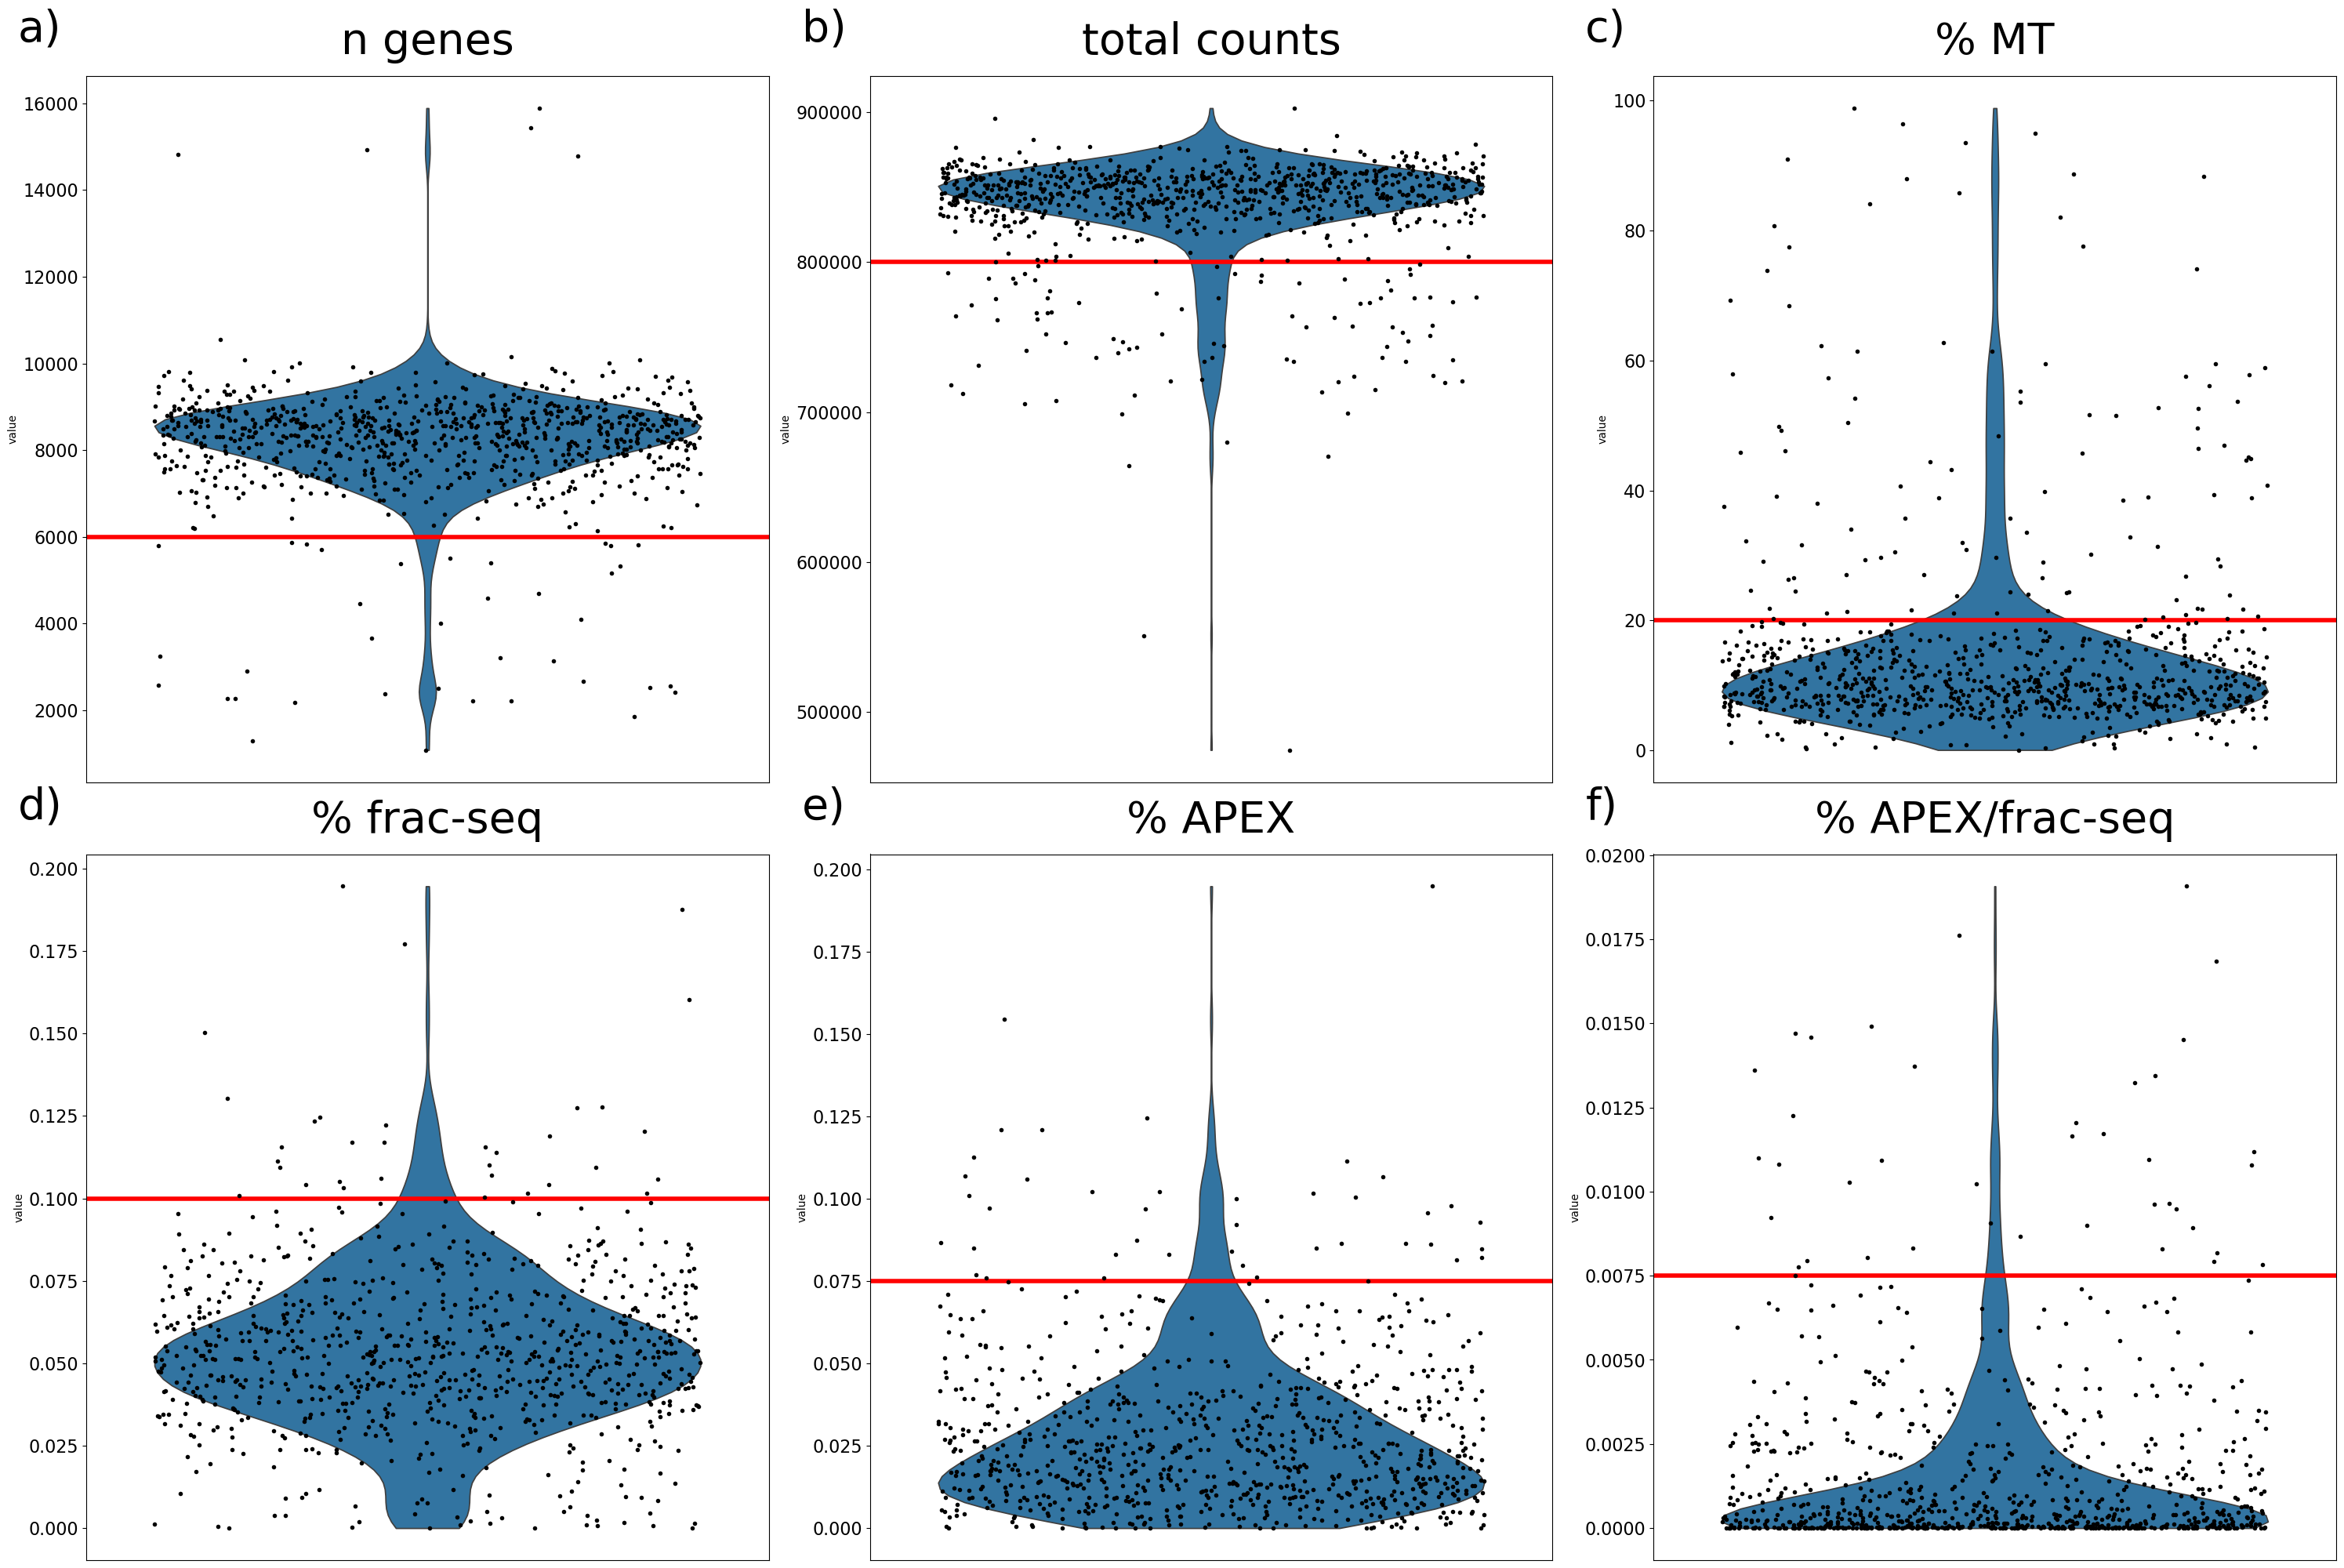

In [26]:
fig_prior,axes_prior=plt.subplots(2,3, figsize= (30,20))
axes_prior=axes_prior.ravel()
for feature, t, l, n, th in list(zip(plots, title, letters, num, threshold)):
    sc.pl.violin(adata_mouse_3_pp, feature, jitter=0.4, size=4, show=False,  ax=axes_prior[n])
    axes_prior[n].axhline(th, linewidth=4, color='r')
    axes_prior[n].set_xticks([])

    axes_prior[n].tick_params(axis='y', labelsize=16)  

    axes_prior[n].annotate(l, xy=(-0.1, 1.05), xycoords="axes fraction", fontsize=40)
    axes_prior[n].set_title(t, fontsize=40, pad=20)
fig_prior.tight_layout()
plt.savefig(r".\figures\violins.png", dpi=600)
plt.show()